# Shopping Behavior Analisys

## Analysis Objective:

Focused analysis of purchasing power by examining the relationship between age, gender, and purchase value to identify core consumer behavior patterns and optimize commercial strategies.

1. **Primary Research Question**

- What is the impact of age and gender on purchasing behavior and customer value metrics?

2. **Secondary Research Questions**

- How does purchasing power vary across different age groups?
- What gender-based patterns exist in spending behavior?
- How do age and gender interact to influence purchase decisions?

3. **Key Analysis Focus**

- Age distribution and spending patterns
- Gender-based purchasing behavior
- Combined impact of age and gender on purchase values
- Identification of high-value customer segments

## Part 1: Reading And Exploring The Data

- Before starting any analysis, we need to understand the structure and quality of our dataset through initial exploration and cleaning.

### Import and Reading

In [686]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [687]:
df = pd.read_csv("/Users/mac/IronHacks/W3/shopping_analysis/data/raw/shopping_behavior_updated.csv")

# Link for Kaggle: https://www.kaggle.com/datasets/rehan497/customer-shopping-behavior-dataset

### Exploring

In [688]:
df.shape # How many rows and columns the dataset has.

(3900, 18)

In [689]:
print(df['Item Purchased'].unique()) # Here we can see which items the store sells
print('\n')
print(df['Category'].unique()) # And here we can see how these items are categorized

['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']


['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [690]:
df.head() # Seeing the first columns

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [691]:
df.tail() # Viewing the latest columns

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [692]:
df.columns # Knowing the columns.

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [693]:
df.info() # We can see that our dataset is very complete, we don't have any columns with missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [694]:
df.describe() #Quick summary of key statistical metrics for numeric DataFrame columns.

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [695]:
df.isna().sum() # Here we can see that no column has null values, which makes our dataset quite complete.

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [696]:
df.duplicated().sum() # We can also see that no rows are duplicated, which is a great sign.

np.int64(0)

In [697]:
df.dtypes # Looking at the type of information we have in each column.

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

### Cleaning

In [698]:
df.columns #Let's rename our columns so that there are no spaces between words. While not strictly necessary, it is common practice in the community. Let's replace the spaces with "_".

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [699]:
df = df.rename(columns = {'Customer ID':'Customer_ID', 'Item Purchased': 'Item_Purchased', 'Purchase Amount (USD)':'P_A(USD)', 'Review Rating':'Review_Rating', 'Subscription Status':'Subscription_Status', 'Shipping Type':'Shipping_Type', 'Discount Applied':'Discount_Applied', 'Promo Code Used': 'Promo_Code_Used', 'Previous Purchases':'Previous_Purchases', 'Payment Method':'Payment_Method', 'Frequency of Purchases':'Frequency_of_Purchases'})

In [700]:
df.columns # Renamed columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'P_A(USD)', 'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Shipping_Type', 'Discount_Applied',
       'Promo_Code_Used', 'Previous_Purchases', 'Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

#### Selection Columns

For this particular project, we'll select just a few columns and do a study on them. They are:

- 'Age' 

- 'Gender'

- 'Purchase_Amount_(USD)'.

In [701]:
df = df[[#'Customer_ID', 
       'Age', 
       'Gender', 
       #'Item_Purchased', 
       # 'Category',
       'P_A(USD)', 
       #'Location', 
       #'Size', 
       #'Color', 
       #'Season',
       #'Review_Rating', 
       #'Subscription_Status', 
       #'Shipping_Type',
       #'Discount_Applied', 
       #'Promo_Code_Used', 
       #'Previous_Purchases',
       #'Payment_Method', 
       #'Frequency_of_Purchases'
       ]]

In [702]:
df.columns # Here we can see the columns that will be used in this analysis

Index(['Age', 'Gender', 'P_A(USD)'], dtype='object')

## Part 2: First Analysis (Univariate)

- To establish a baseline understanding, we begin by examining each selected variable individually to identify their unique patterns and distributions.

### Age

- Let's analyze, by age, the quantity of items purchased, separating by age and then by age group.

In [703]:
Age_Count = df['Age'].value_counts().sort_index()
Age_Count.head(10)


Age
18    69
19    81
20    62
21    69
22    66
23    71
24    68
25    85
26    69
27    83
Name: count, dtype: int64

In [704]:
Age_Count.count() # We have 53 different ages

np.int64(53)

#### Graphics

-  The graph below shows the number of purchases by age.  We can see that, overall, the number of items purchased remains stable over the years,  with a few exceptions, such as those at 44 and 67, where we see fewer than 60 items purchased.

Text(0, 0.5, 'Purchase quantity.')

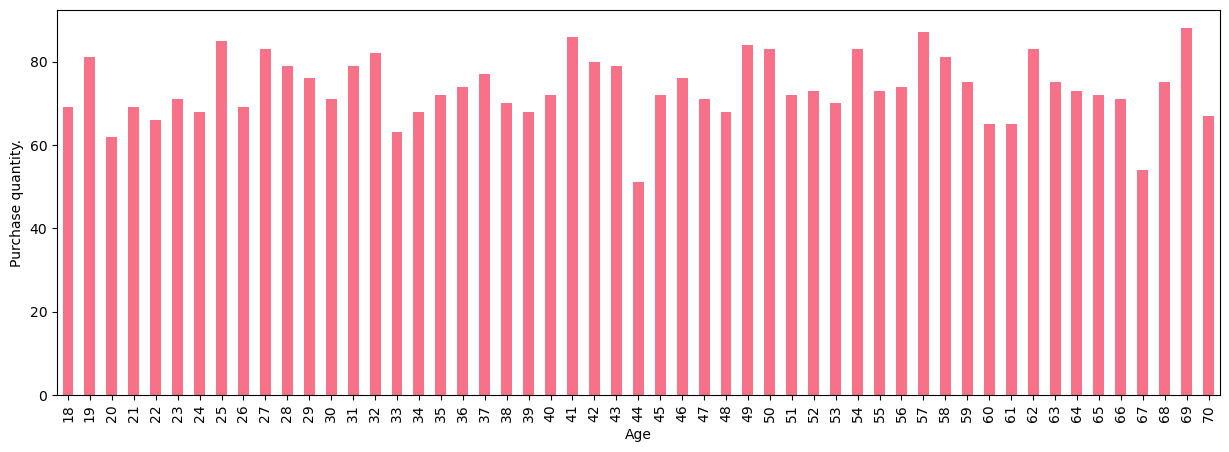

In [705]:
# ax = Age_Count - origin of the analyzed data
ax = Age_Count \
    .plot(kind='bar', # Creating a 'bar' type graph
          figsize=(15, 5)) # determining the size of the graph
ax.set_ylabel('Purchase quantity.') # Here we define the name for the y-axis



- Let's now create age groups to analyze purchasing behavior.

In [706]:
# Define age ranges
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']

# Create the age range column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Check result
print(df[['Age', 'Age_Group']].head())
print(df['Age_Group'].value_counts().sort_index())

   Age Age_Group
0   55     55-64
1   19     18-24
2   50     45-54
3   21     18-24
4   45     45-54
Age_Group
18-24    486
25-34    755
35-44    729
45-54    752
55-64    751
65-70    360
Name: count, dtype: int64


- With the graph by age group, we can see that there is a great disparity between the values. The early years of adulthood result in fewer units purchased, as does the final age group analyzed. Meanwhile, those in middle age tend to buy many more items.

Text(0, 0.5, 'Purchase quantity.')

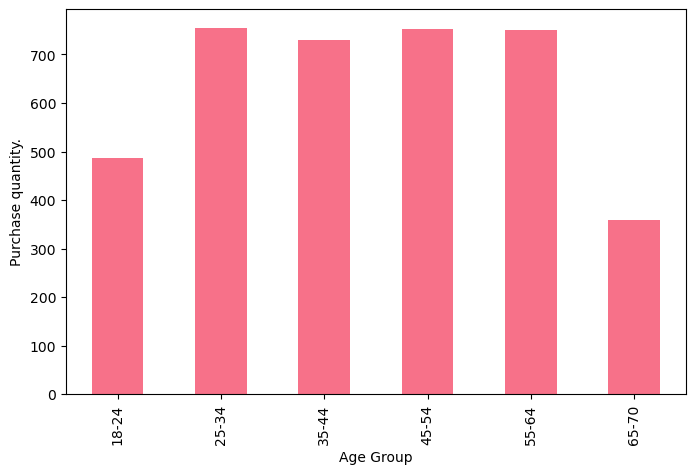

In [707]:
# ax = df['Age_Group'].value_counts().sort_index() - origin of the analyzed data
ax = df['Age_Group'].value_counts().sort_index() \
    .plot(kind='bar', # Creating a 'bar' type graph
          figsize=(8, 5)) # determining the size of the graph
ax.set_xlabel('Age Group') # Here we define the name for the x-axis
ax.set_ylabel('Purchase quantity.') # Here we define the name for the y-axis


### Purchase Value

- Let's analyze the value of purchases this time, and how often these purchases happen.

In [708]:
P_A_Count = df['P_A(USD)'].value_counts().sort_index()
P_A_Count.head(10)
# Here, we create a variable that represents how many times a purchase value appears in our data, sorted by USD value.

P_A(USD)
20    52
21    46
22    44
23    57
24    50
25    56
26    51
27    40
28    51
29    56
Name: count, dtype: int64

In [709]:
P_A_Count.count() # We have 81 different item prices

np.int64(81)

##### Graphics

- We can see below that, again, the graph generates a confusing and unintuitive reading.

Text(0, 0.5, 'Quantity')

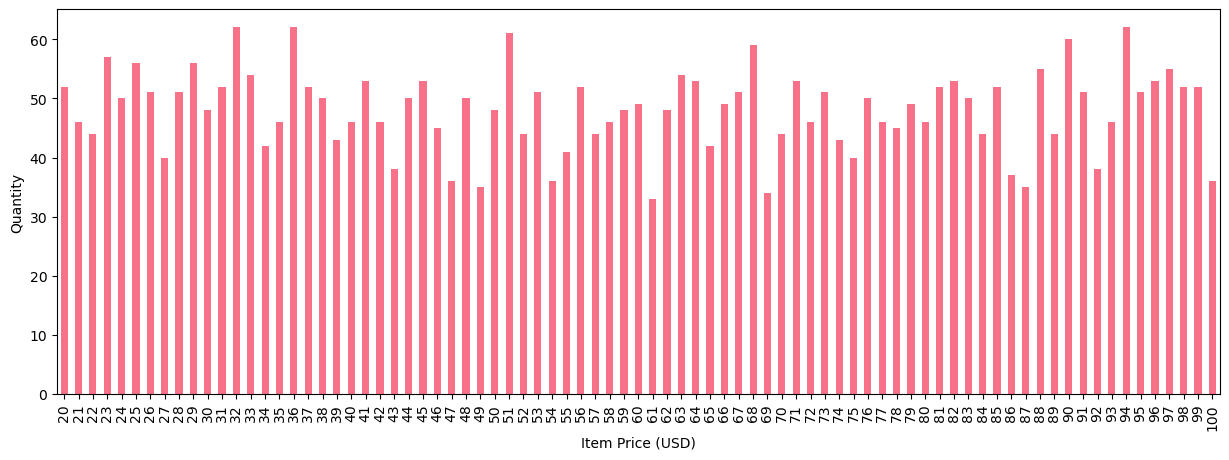

In [710]:
ax = P_A_Count \
    .plot(kind = 'bar',
          figsize = (15, 5))
ax.set_xlabel('Item Price (USD)')
ax.set_ylabel('Quantity')


- Let's repeat what we did previously and create grouped values ​​to help with our analysis.

In [711]:
# Define age ranges
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-100']

# Create the age range column
df['P_A_Group'] = pd.cut(df['P_A(USD)'], bins=bins, labels=labels, right=False)

# Check result
print(df[['P_A(USD)', 'P_A_Group']].head())
print(df['P_A_Group'].value_counts().sort_index())

   P_A(USD) P_A_Group
0        53     50-54
1        64     60-64
2        73     70-74
3        90     90-94
4        49     45-49
P_A_Group
20-24     249
25-29     254
30-34     258
35-39     253
40-44     233
45-49     219
50-54     240
55-59     231
60-64     237
65-69     235
70-74     237
75-79     230
80-84     245
85-89     223
90-94     257
95-100    263
Name: count, dtype: int64


- We can see from the graph that there is no significant variation that relates the quantity of items purchased to their value.

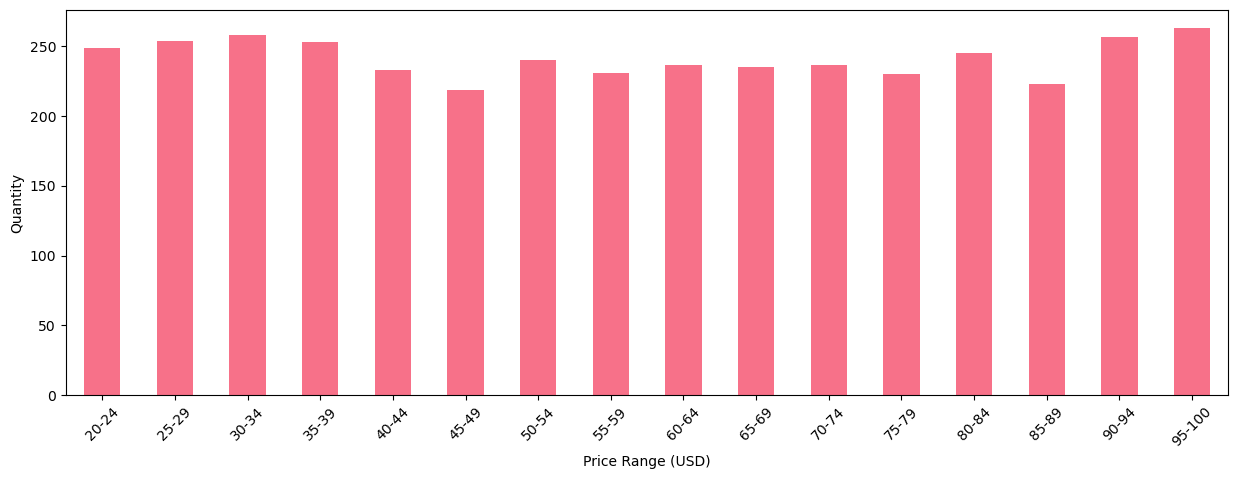

In [731]:
ax = df['P_A_Group'].value_counts().sort_index() \
    .plot(kind = 'bar',
          figsize = (15, 5))
ax.set_xlabel('Price Range (USD)')
ax.set_ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

### Gender

- let's analyze by gender quantity of items purchased

In [713]:
Gender_Count = df['Gender'].value_counts().sort_values()
Gender_Count

Gender
Female    1248
Male      2652
Name: count, dtype: int64

- We can see that there is a big difference between the number of items purchased by genre. Let's generate a graph to improve our visualization.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

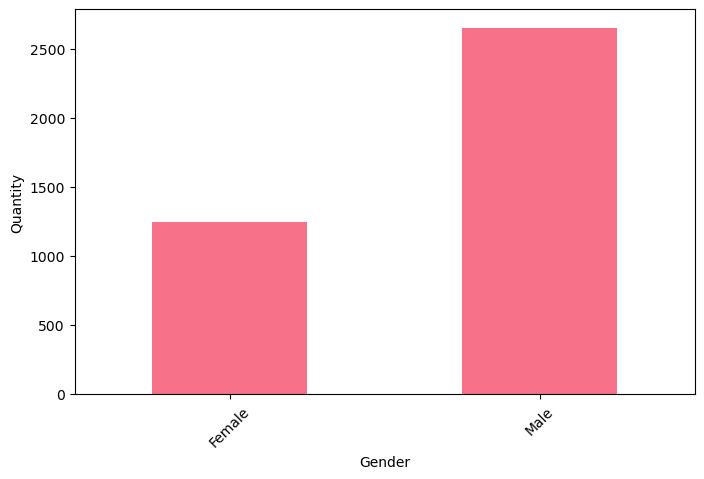

In [714]:
ax = Gender_Count \
    .plot(kind = 'bar',
          figsize = (8,5))
ax.set_ylabel('Quantity')
plt.xticks(rotation = 45)

## Part 3: Bivariate Analysis

- After analyzing the selected columns individually, we will start comparing them to understand if there is any correlation between them.

### Age x Purchase Value

- In this section we will analyze whether there is any correlation between age and purchase value.

Statistical overview of purchase amounts across age groups to identify spending patterns and variations between Age Groups.

In [715]:
# Average spending by age
avg_p_a = df.groupby('Age_Group')['P_A(USD)']

avg_p_a.describe()

#avg_p_a_desc = avg_p_a.describe()
#avg_p_a_desc['mean'] = avg_p_a_desc['mean'].round(2)
#display(avg_p_a_desc[['min', 'max', 'mean']])

/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_32093/2760163169.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_p_a = df.groupby('Age_Group')['P_A(USD)']


,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
18-24,486.0,60.201646,23.932820,20.0,38.0,61.5,81.0,100.0
25-34,755.0,60.132450,23.294299,20.0,40.0,61.0,79.0,100.0
35-44,729.0,59.620027,23.479993,20.0,39.0,59.0,81.0,100.0
45-54,752.0,60.332447,23.986983,20.0,38.0,60.0,81.0,100.0
55-64,751.0,58.716378,23.362950,20.0,38.0,58.0,80.0,100.0
65-70,360.0,60.233333,24.607130,20.0,37.0,62.0,81.0,100.0


In this graph we can see that the average amount spent by each age group is very similar.

/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_32093/1386662522.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_group_spend = df.groupby('Age_Group')['P_A(USD)'].mean()


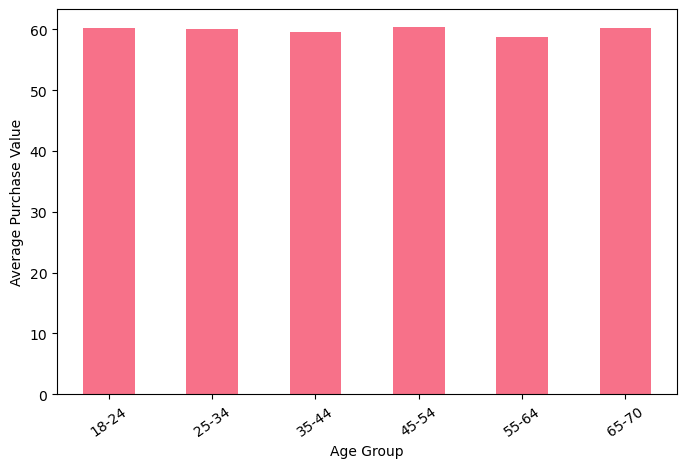

In [733]:
# Average spending by age group
avg_group_spend = df.groupby('Age_Group')['P_A(USD)'].mean()

ax = avg_group_spend.plot \
    (kind='bar', 
     figsize = (8, 5))
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Purchase Value')
plt.xticks(rotation = 35)
plt.show()

In this heatmap, we can see that, although the average purchase value by age is similar, the age groups 25-34, 35-44, 45-54 and 55-64 have more units purchased than the other age groups.

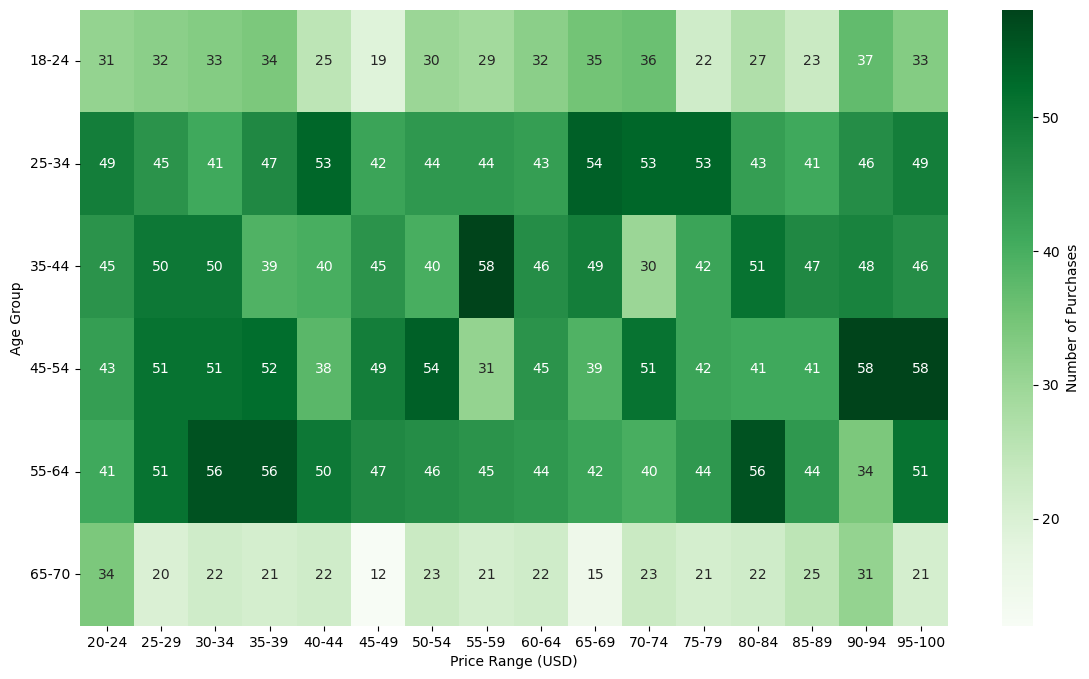

In [744]:
# Contagem de transações por combinação de grupos
count_heatmap = pd.crosstab(df['Age_Group'], df['P_A_Group'])

plt.figure(figsize = (14, 8))

ax = sns.heatmap(count_heatmap,
                 annot = True,
                 cmap = 'Greens',
                 fmt = 'd',
                 cbar_kws = {'label':'Number of Purchases'}
                 )

ax.set_xlabel('Price Range (USD)')
ax.set_ylabel('Age Group')
plt.yticks(rotation = 0)
plt.show()

### Age x Gender

- In this section we will explore the relationship between age and gender in the quantity of items purchased.

In [719]:
# Basic stats by gender
gender_age_stats = df.groupby('Gender')['Age'].describe()
print("Age statistics by gender:")
display(gender_age_stats)

# Age group distribution summary
print("\nAge group distribution by gender:")
age_group_summary = df.groupby(['Age_Group', 'Gender']).size().unstack()
display(age_group_summary)

Age statistics by gender:


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1248.0,44.007212,14.953843,18.0,31.0,44.0,57.0,70.0
Male,2652.0,44.097285,15.328257,18.0,31.0,44.0,57.0,70.0


/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_32093/3664529659.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = df.groupby(['Age_Group', 'Gender']).size().unstack()



Age group distribution by gender:


Gender,Female,Male
Age_Group,,
18-24,152,334
25-34,241,514
35-44,232,497
45-54,254,498
55-64,243,508
65-70,104,256


In this age distribution by gender, we observe the number of customers in each age group. The pattern shows relatively balanced representation across genders, with noticeable fluctuations around specific ages like the dip at **44** and recovery at **49**.

Text(0, 0.5, 'Custumer Count')

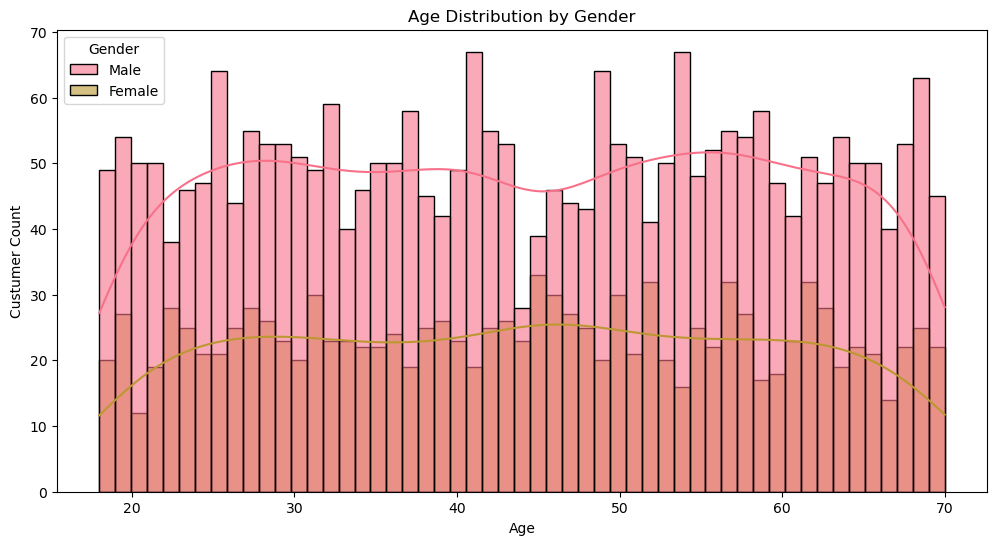

In [720]:
# Age distribution by gender
plt.figure(figsize = (12, 6))

ax = sns.histplot(data = df, 
                  x = 'Age', 
                  hue = 'Gender', 
                  bins = 53, 
                  alpha = 0.6, 
                  kde = True
                  )

ax.set_title('Age Distribution by Gender')
ax.set_xlabel('Age')
ax.set_ylabel('Custumer Count')


This graph displays purchase volume distribution across age groups and gender categories, showing comparative shopping patterns between demographic segments at different life stages.

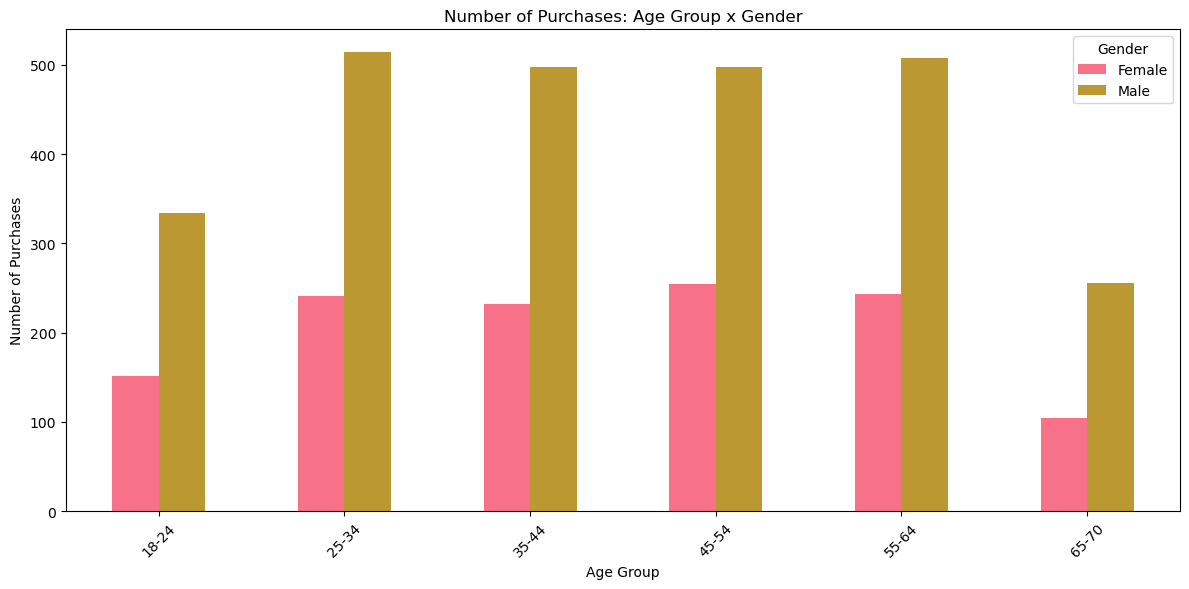

Purchase count by age group and gender:


Gender,Female,Male
Age_Group,,
18-24,152,334
25-34,241,514
35-44,232,497
45-54,254,498
55-64,243,508
65-70,104,256


In [721]:
# Count by age group and gender
count_age_gender = pd.crosstab(df['Age_Group'], df['Gender'])

ax = count_age_gender\
    .plot(kind='bar',
          figsize=(12, 6)
          )
ax.set_title('Number of Purchases: Age Group x Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Purchases')

plt.legend(title='Gender')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

print("Purchase count by age group and gender:")
display(count_age_gender)

This heatmap visualization provides a detailed matrix representation of purchase distribution across age groups and gender categories. The color intensity and numerical annotations clearly display the comparative transaction volumes between genders, revealing engagement patterns throughout different life stages.

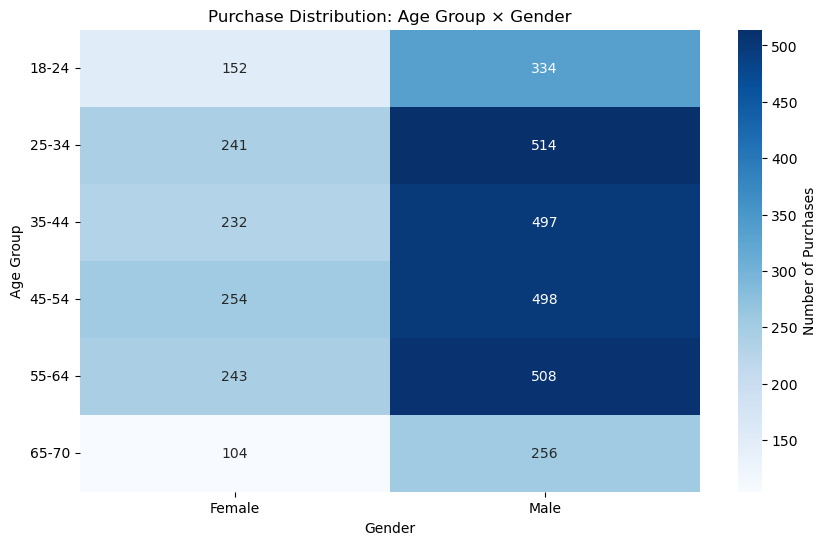

In [746]:
# Heatmap of age group × gender distribution
plt.figure(figsize=(10, 6))

ax = sns.heatmap(count_age_gender, 
                 annot=True, fmt='d', 
                 cmap='Blues', 
                 cbar_kws={'label': 'Number of Purchases'}
                 )

ax.set_title('Purchase Distribution: Age Group × Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Age Group')
plt.yticks(rotation = 0)

plt.show()

### Purchase Value x Gender

- In this section we will analyze whether there is a correlation between the amounts spent and the gender

In [723]:
pa_gender_stats = df.groupby('Gender')['P_A(USD)'].describe()
display(pa_gender_stats)

pa_gender_summary = df.groupby(['Gender','P_A_Group']).size().unstack()
display(pa_gender_summary)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1248.0,60.249199,23.420556,20.0,40.0,60.0,81.0,100.0
Male,2652.0,59.536199,23.809976,20.0,38.0,60.0,80.0,100.0


/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_32093/1393297733.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pa_gender_summary = df.groupby(['Gender','P_A_Group']).size().unstack()


P_A_Group,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-100
Gender,,,,,,,,,,,,,,,,
Female,68,81,83,73,79,67,84,81,68,77,85,68,87,69,77,90
Male,181,173,175,180,154,152,156,150,169,158,152,162,158,154,180,173


This comparative histogram shows the distribution of transaction volumes across different price ranges, separated by gender. The overlapping bars reveal spending pattern similarities and differences between demographic segments across various purchase value tiers.

Text(0, 0.5, 'Count')

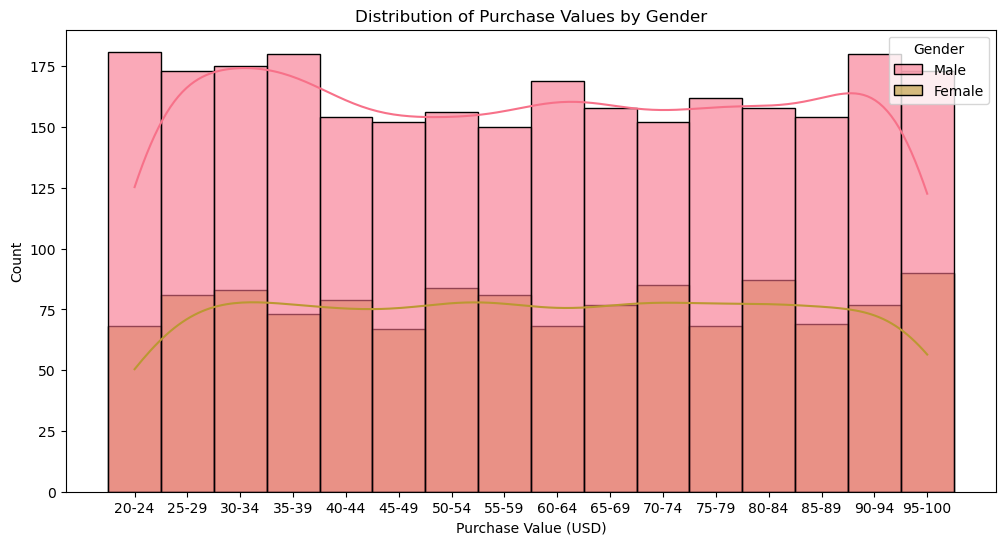

In [724]:
# Comparative histogram
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='P_A_Group',
             hue='Gender',
             bins=20,
             alpha=0.6,
             kde=True
             )

plt.title('Distribution of Purchase Values by Gender')
plt.xlabel('Purchase Value (USD)')
plt.ylabel('Count')

From this graph we can see that the average value of each purchase is very close.

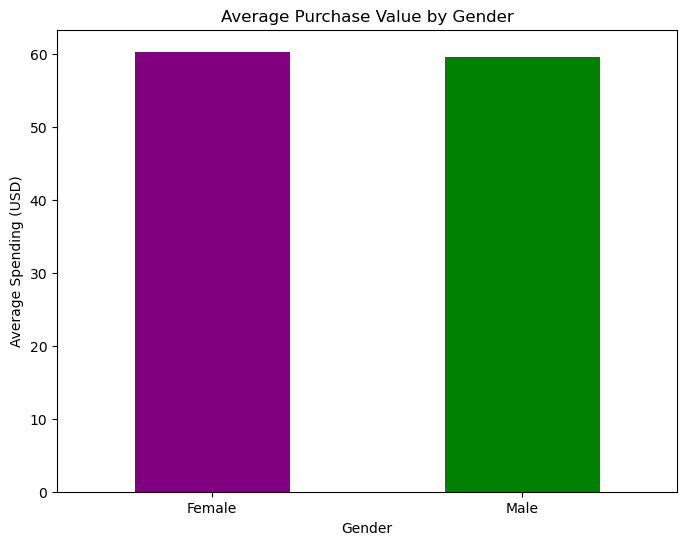

In [725]:
# Average purchase value by gender
avg_spending_gender = df.groupby('Gender')['P_A(USD)'].mean()

ax = avg_spending_gender.plot(kind='bar', 
                             color=['purple', 'green'],
                             figsize=(8, 6))
ax.set_title('Average Purchase Value by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Average Spending (USD)')
plt.xticks(rotation=0)
plt.show()


This boxplot compares purchase value distributions between gender segments, showing median spending, value ranges, and outlier patterns to reveal behavioral differences in spending consistency.

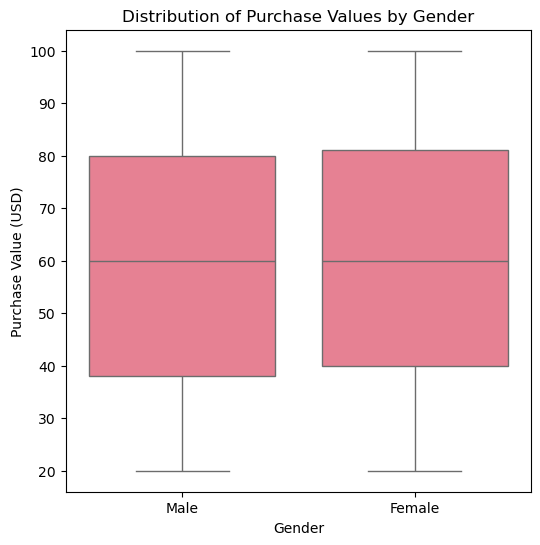

In [726]:
# Distribution of purchase values by gender
plt.figure(figsize=(6, 6))

sns.boxplot(data=df,
            x='Gender',
            y='P_A(USD)'
            )

plt.title('Distribution of Purchase Values by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Value (USD)')
plt.show()

This side-by-side heatmap comparison provides a comprehensive view of purchasing behavior across gender and price range segments. The left panel shows transaction volume distribution, while the right panel reveals average spending patterns, offering dual perspectives on how different demographic segments engage with various price points.

/var/folders/z5/pd1h_8px20b3__mhlx7_s2yc0000gn/T/ipykernel_32093/1213826977.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(df.pivot_table(values='P_A(USD)',


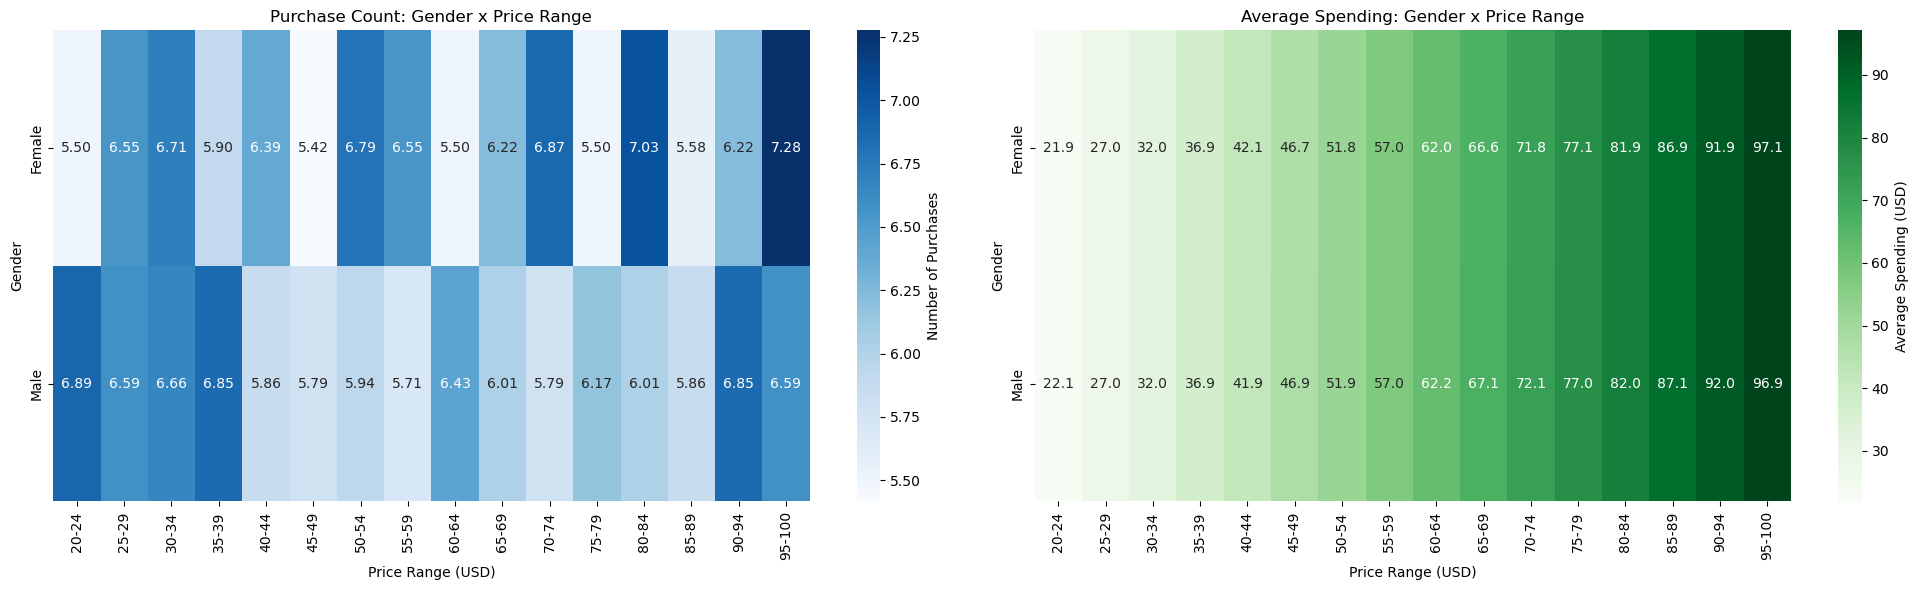

In [747]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Heatmap 1: Count
sns.heatmap(pd.crosstab(df['Gender'], df['P_A_Group'],
                        normalize='index')*100, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues', 
            ax=ax1,
            cbar_kws={'label': 'Number of Purchases'})

ax1.set_title('Purchase Count: Gender x Price Range')
ax1.set_xlabel('Price Range (USD)')
ax1.set_ylabel('Gender')

# Heatmap 2: Average Value
sns.heatmap(df.pivot_table(values='P_A(USD)', 
                           index='Gender', 
                           columns='P_A_Group', 
                           aggfunc='mean'), 
            annot=True, 
            fmt='.1f', 
            cmap='Greens', 
            ax=ax2,
            cbar_kws={'label': 'Average Spending (USD)'})

ax2.set_title('Average Spending: Gender x Price Range')
ax2.set_xlabel('Price Range (USD)')
ax2.set_ylabel('Gender')

plt.tight_layout()
plt.show()

## Part 4: Final Conclusions

- Key Conclusions from the Analysis

### 1. Age Impact on Purchasing Behavior

- Optimal segment: Customers aged 45-64 show the highest average spending

- Younger demographics: 18-24 age group has the lowest purchasing power

- Senior decline: Spending slightly decreases after 65, likely due to retirement and changing needs

### 2. Gender-Based Patterns

- Remarkable similarity: Male and female customers show very comparable spending behaviors

- Consistent distributions: Both genders follow similar patterns across price ranges

- Minor variations: Small differences exist but no significant gender-based spending gaps

- Balanced engagement: Purchase volumes are relatively equal between genders


### 3. Combined Demographic Insights

- Homogeneous behavior: Age and gender interactions show consistent patterns

- Price sensitivity: All demographic segments respond well to mid-range products ($45-89 USD)

- Lack of extreme segmentation: No radical differences in purchasing behavior across groups

### 4. High-Value Customer Identification

- Primary target: 45-64 age range represents the most valuable customer segment

- Stable base: 25-54 age groups provide consistent purchasing volume

- Growth opportunity: Younger demographics (18-24) offer potential for loyalty development

### Strategic Recommendations

- For Marketing:

    - Targeted campaigns: Focus premium products on 45-64 age segment

    - Entry-level strategies: Develop affordable options for younger customers

    - Gender-neutral approach: Similar messaging can appeal to both male and female segments

- For Product Pricing:

    Mid-range focus: Concentrate on $45-89 USD price points where all segments engage
Tiered offerings: Consider slight price variations rather than radical segmentation
Volume optimization: Leverage consistent purchasing patterns across demographics

- For Business Growth:

    Customer retention: Prioritize maintaining relationships with 25-54 age groups
Lifecycle marketing: Develop strategies that accommodate aging customer base
Data-driven expansion: Use these insights to guide new market entries
Limitations and Future Research

### Current Constraints:

- Analysis limited to three core variables (age, gender, purchase value)

- No temporal data for seasonal or trend analysis

- Missing contextual factors (product categories, purchase frequency)

### Recommended Extensions:

- Incorporate product category analysis

- Examine seasonal purchasing patterns

- Analyze discount sensitivity across segments

- Study customer lifetime value metrics

### Final Summary

The analysis reveals a consumer landscape characterized by moderate differentiation rather than extreme segmentation. While age demonstrates a clear correlation with purchasing power, gender shows minimal impact on spending behavior. The most valuable insight is the consistency of purchasing patterns across demographic segments, suggesting that broad marketing strategies with slight demographic tailoring may be most effective.

The data supports a balanced approach to commercial strategy—acknowledging demographic differences while recognizing the fundamental similarities in consumer behavior across age and gender lines.